# Heart Disease Prediction

## 1. Introduction

**Research Question:**  *How accurately can we predict the likelihood of heart disease based on given health factors?*

The phrase "heart disease" can refer to various different conditions relating to the heart. Symptoms can range from chest pain and shortness of breath to more extreme symptoms, such as heart attack and failure. A wide range of factors can impact the likelihood of having heart disease; further, doctors may find it useful to posess a model that could predict if an individual has heart disease.

The goal of this project is to determine the accuracy of predicting heart disease based on certain factors. We will use  Cleveland database, extracted from the UCI Machine Learning Repository's Heart Disease Data Set, to provide data on such factors including age, maximum hearth rate, etcetera. The database was extracted from the work of Dr. Robert Detrano with V.A. Medical Center.

## 2. Preliminary Data Analysis

### Loading Libraries

In [1]:
#load packages 
library(tidyverse)
library(repr)
library(cowplot)
library(tidymodels)

#set seed
set.seed(1234)

#number rows for table
options(repr.matrix.max.rows = 8)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Importing Data

In [2]:
#import through link
link <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
untidy_cleveland <- read_csv(link, col_names = FALSE)
untidy_cleveland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


Figure 1. Untidy tibble of Cleveland heart disease data

### Data Cleaning 

Column names must be changed, rows with "?" (NA) values must be removed, some columns must be changed to double data type, integer type, and factor type.

In [3]:
#renaming the column names
colnames(untidy_cleveland) = c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num")

tidy_cleveland = untidy_cleveland |> 
 filter(ca != "?", thal != "?") |>   #in ca and thal there were "?" values
 mutate(age = as.integer(age)) |> #age cannot be decimals
 mutate(ca = as.factor (ca), num = as.factor(num), sex = as.factor(sex), cp = as.factor(cp), fbs = as.factor(fbs), restecg = as.factor(restecg), exang = as.factor(exang), slope = as.factor(slope), thal = as.factor(thal))   #categorical data not <dbl>

tidy_cleveland
    

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


Figure 2. Tidy tibble of Cleveland heart disease data

#### Attribute Information

The column names are given by the data set description on the UCI Machine Learning Repository page

**age:** age in years

**sex:** sex (1 = male, 0 = female)

**cp:** chest pain type (1 = typical angina, 2 = atypical angina, 3 = non-anginal pain, 4 = asymptomatic)

**trestbps:** resting blood pressure (in mmHg)

**chol:** serum cholestoral (in mg/dl)

**fbs:** fasting blood sugar > 120 mg/dl (1 = true,  0 = false)

**restecg:** resting electrocardiographic results (0 = normal, 1 = stt abnormality, 2 = lv hypertrophy)

**thalach:** maximum heart rate achieved

**excang:** exercise induced angina (1 = yes, 0 = no)

**oldpeak:** ST depression induced by exercise relative to rest

**slope:** slope of the peak exercise ST segment (1 = upsloping, 2 = flat, 3 = downsloping)

**ca:** number of major vessels (0-3) colored by flourosopy

**thal:** 3 = normal, 6 = fixed defect, 7 = reversable defect

**num:** diagnosis of heart disease (1 >= heart disease exists, 0 = no risk of heart disease)

### Regrouping the response variable

Since num appears to be binary (no heart disease or heart disease) we can use mutate to change the values of num.

In [4]:
new_cleveland <- tidy_cleveland |> 
#if num >= 1, change to "Y" else "N" ("Y" = disease present, "N" = no disease)
 mutate(disease = ifelse(num == 1 | num == 2 | num == 3 | num == 4, "Y", "N")) |> 
 mutate(disease = as.factor(disease)) |>
 select(-num)

### Splitting into Training and Testing Sets

The data will be split into a training set and testing set and only the training set will be used to construct the classifier. After the classifier is built, its accuracy can be determined when it predicts the labels for the testing set (without disease values). The proportion of the data grouped as the training set will be 0.75 will the testing set is 0.25 of the data. 

In [5]:
#stratifying disease such that sufficient proportions of 1 and 0 in each set
cleveland_split <- initial_split(new_cleveland, prop = 0.75, strata = disease) 

disease_training <- training(cleveland_split)

disease_testing <- testing(cleveland_split)

disease_training #tibble is 222 x 14, 297 * 0.75 = 222.75 so successfully split

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,disease
<int>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,N
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,N
56,1,2,120,236,0,0,178,0,0.8,1,0.0,3.0,N
57,1,4,140,192,0,0,148,0,0.4,2,0.0,6.0,N
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,0,4,140,241,0,0,123,1,0.2,2,0.0,7.0,Y
45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,Y
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,Y
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,Y


Figure 3. Training set with 75% of the total data

### Data Analysis

A table displaying proportions of the people with disease would give us more information about the training set.

In [6]:
#finding proportion of disease

disease_proportions <- disease_training |>
 group_by(disease) |>
 summarize(n = n()) |>
 mutate(precent = 100*n/nrow(disease_training))

disease_proportions

disease,n,precent
<fct>,<int>,<dbl>
N,120,54.05405
Y,102,45.94595


Figure 4. Table displaying that heart disease is present ~46% training data patients

Below are scatterplots to show what predictors may be effective in prediciting the likelihood of heart disease in a patient. 

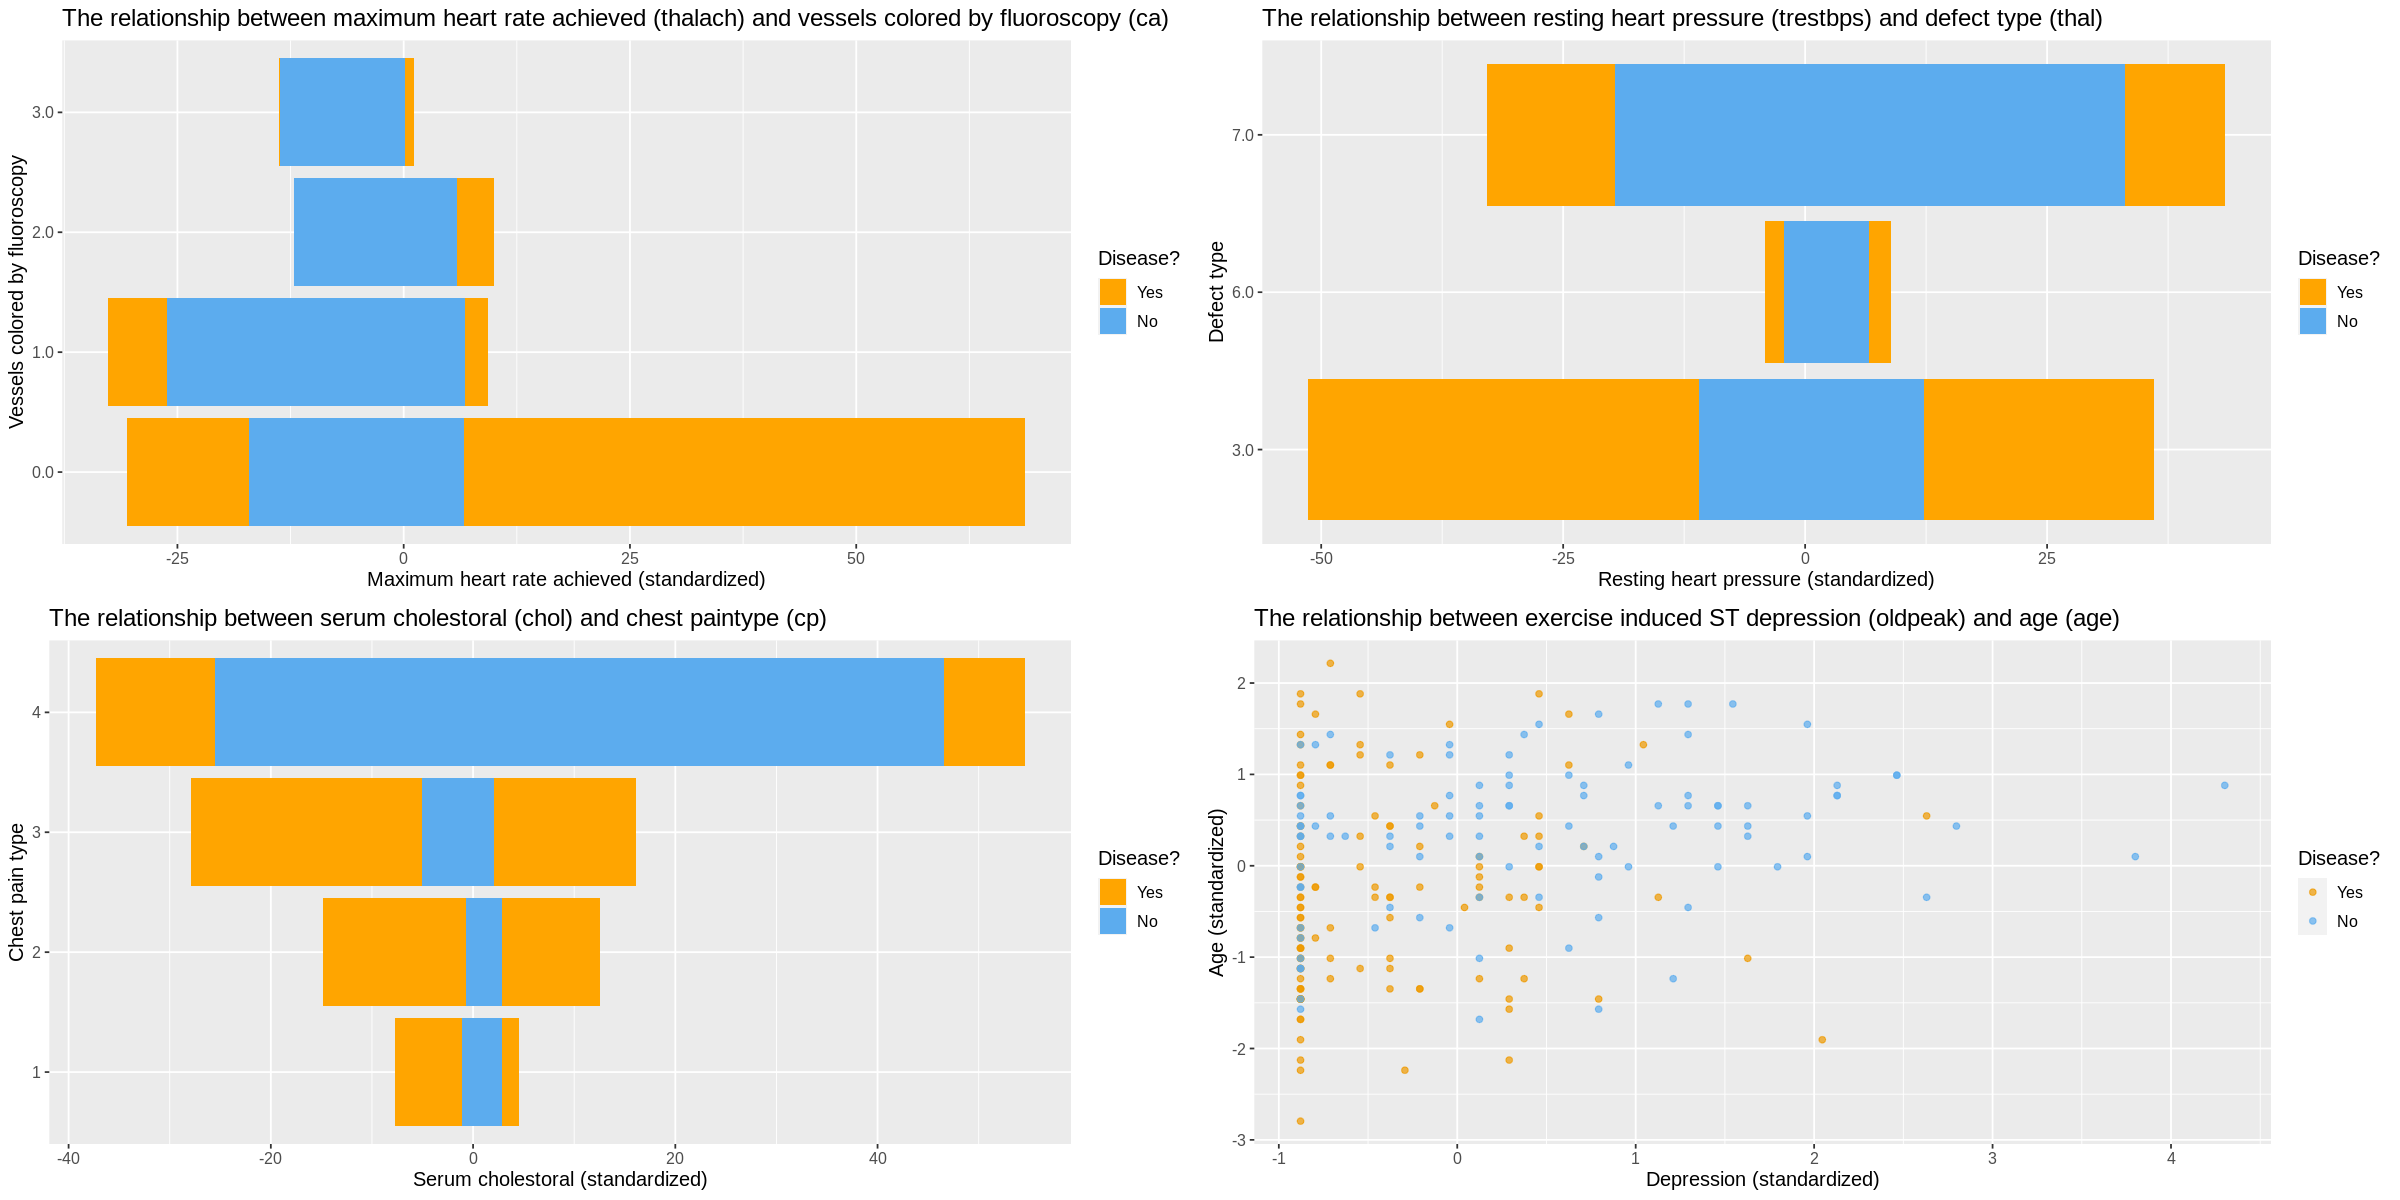

In [11]:
#first standardize <dbl> <int> data
standardize <- recipe(disease ~., data = disease_training) |> 
 step_scale(age, trestbps, chol, thalach, oldpeak) |> 
 step_center(age, trestbps, chol, thalach, oldpeak) |> 
 prep() 

disease_training_standard <- bake(standardize, disease_training)

#then plot different predictors 
options(repr.plot.height = 10, repr.plot.width = 20)

thalach_ca <- disease_training_standard |> 
 ggplot(aes(x = thalach, y = ca, fill = disease)) +
 geom_bar(stat = "identity") + 
 labs(x = "Maximum heart rate achieved (standardized)", y = "Vessels colored by fluoroscopy", fill = "Disease?") + 
 scale_fill_manual(labels = c("Yes", "No"), values = c("orange", "steelblue2")) + 
 ggtitle("The relationship between maximum heart rate achieved (thalach) and vessels colored by fluoroscopy (ca)") +
 theme(text = element_text(size = 12))

trestbps_thal <- disease_training_standard |> 
 ggplot(aes(x = trestbps, y = thal, fill = disease)) +
 geom_bar(stat = "identity") + 
 labs(x = "Resting heart pressure (standardized)", y = "Defect type", fill = "Disease?") + 
 scale_fill_manual(labels = c("Yes", "No"), values = c("orange", "steelblue2")) + 
 ggtitle("The relationship between resting heart pressure (trestbps) and defect type (thal)") +
 theme(text = element_text(size = 12))

chol_cp <- disease_training_standard |> 
 ggplot(aes(x = chol, y = cp, fill = disease)) +
 geom_bar(stat = "identity") + 
 labs(x = "Serum cholestoral (standardized)", y = "Chest pain type", fill = "Disease?") + 
 scale_fill_manual(labels = c("Yes", "No"), values = c("orange", "steelblue2")) + 
  ggtitle("The relationship between serum cholestoral (chol) and chest paintype (cp)") +
 theme(text = element_text(size = 12))

oldpeak_age <- disease_training_standard |> 
 ggplot(aes(x = oldpeak, y = age, color = disease)) +
 geom_point(alpha = 0.7) + 
 labs(x = "Depression (standardized)", y = "Age (standardized)", color = "Disease?") + 
 scale_color_manual(labels = c("Yes", "No"), values = c("orange2", "steelblue2")) + 
  ggtitle("The relationship between exercise induced ST depression (oldpeak) and age (age)") +
 theme(text = element_text(size = 12))

#create the plots 
grid_plot <- plot_grid(thalach_ca, trestbps_thal, chol_cp, oldpeak_age, ncol = 2)

grid_plot

Figure 5. Graphed relationships between predictors in the dataset

## 3. Methods

The overall analysis will follow a clear path: 

 - Split training data into five-fold validation
 - Create recipe using predictors such as ca, thal, cp, and oldpeak (the thalach vs. ca graph shows that there is a higher ratio of patients with heart disease for 0 vessels colored - the trestbps vs. thal shows that when defect type is 3 there is higher ration of patients with heart disease - the chol vs. cp graph shows changing proportions of disease for chest pain types - as oldpeak goes towards the left ratio of diseased patients increases)
 - K-nearest neighbors specification will be set to neighbors = tune() 
 - The function tune_grid can be added to the workflow along with the recipe and specification to determine the best K values in terms of accuracy 
 - Classifier will be retrained with best K value 
 - Testing set of data will be used to estimate accuracy 
 - One graph of results would be a graph with k values on the x-axis and accuracy on the y-axis that helps identify the best k value 

## 4. Expected outcomes and significance

Our group hopes that the classification model created can accurately predict if a patient has heart disease based on given health properties. This would be implemented in healthcare so doctors would only have to conduct further examination of patients who have been selected through this process. 

## 5. Sources

Detrano, R. (1990). *Cleveland* [Data set]. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation.      
     https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data